In [ ]:
import os, cv2
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf

# Pathes to model and weights

In [ ]:
path_to_model = '/home/ubuntu/models/model_76.json'
path_to_weights = '/home/ubuntu/models/weigths_76.h5'

# Loading test images

In [ ]:
ROWS = 128
COLS = 128
CHANNELS = 3
TEST_DIR = '/opt/source/datasets/cats_dogs/test1/'
all_image_names = os.listdir(TEST_DIR)
all_image_names.sort()
#test_images =  [TEST_DIR+i for i in all_image_names[6:11] + all_image_names[19:32] + all_image_names[33:34]]
test_images = [TEST_DIR+i for i in all_image_names[:1000]]

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC).reshape(ROWS, COLS, CHANNELS)

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
    return data
test = prep_data(test_images)

# Loading the model and making predictions on test data

In [ ]:
with tf.device('/cpu:0'):
    model = load_model(path_to_model)
    model.load_weights(path_to_weights)
    predictions = model.predict(test, verbose=2)     

# Visualizing results (rendering can take about a minute)

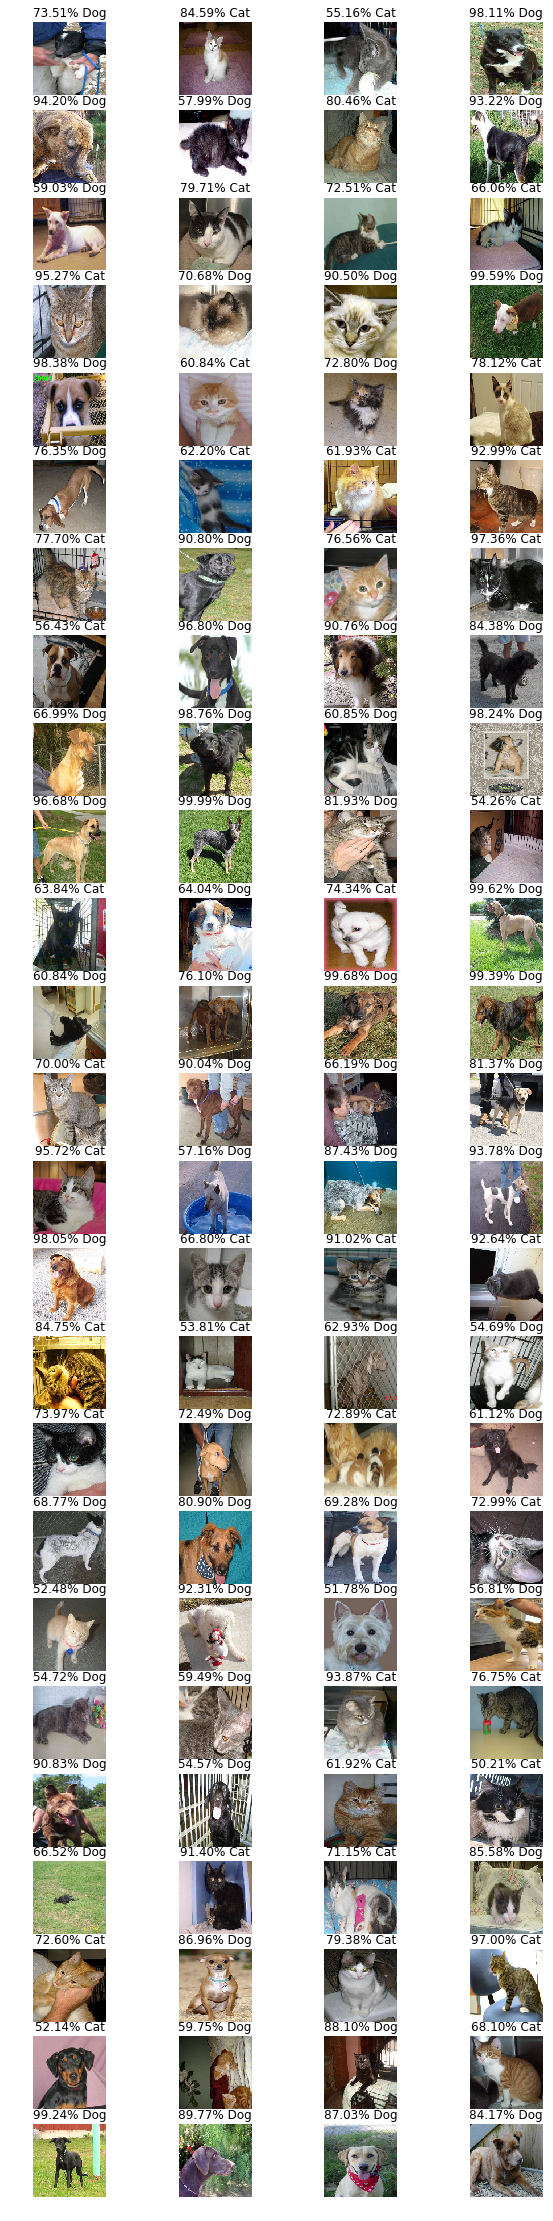

In [12]:
plt.figure(figsize=(10, 40))
for i in range(0, 100):
    plt.subplot(25, 4, i+1)
    if predictions[i, 0] >= 0.5: 
        plt.title('{:.2%} Dog'.format(predictions[i][0]))
    else: 
        plt.title('{:.2%} Cat'.format(1-predictions[i][0]))
        
    plt.imshow(cv2.cvtColor(test[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()